<a href="https://colab.research.google.com/github/himeshps/Tidal_Volume_Submission_230478/blob/main/TidalVolumePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Importing the required python libraries, my approach is to find the best fitting model out of the ones mentioned.
#The models that I have used in this notebook are Linear Regression, Support Vector Machine, Gradient Booster Regression, Random Forest Regression.
#I have individually tested all the models and chosen the best one.

#This codeblock is specifically importing for linear regression.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [18]:
# Mounting the google drive to import the dataset.
#I will be leaving the link to the drive on readme commit of the repo for verification purposes.

df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separating the features used for prediction and the target variable

X = df[['age', 'height','chest_circumference', 'BodyMassIndex','weight']]
y = df['tidal_volume']

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

#Feature Scaling
scaler = StandardScaler()

# Fit scaler on training data and transforming the data post partition.
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Implementing Linear Regression model on the scaled data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Final Predictions delievered
y_pred = model.predict(X_val_scaled)

In [22]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
mae = mean_absolute_error(y_val, y_pred)

print("Mean Absolute Error:", mae)


Mean Squared Error: 675.8480794023885
R-squared: 0.7197907962490695
Mean Absolute Error: 20.782270329173812


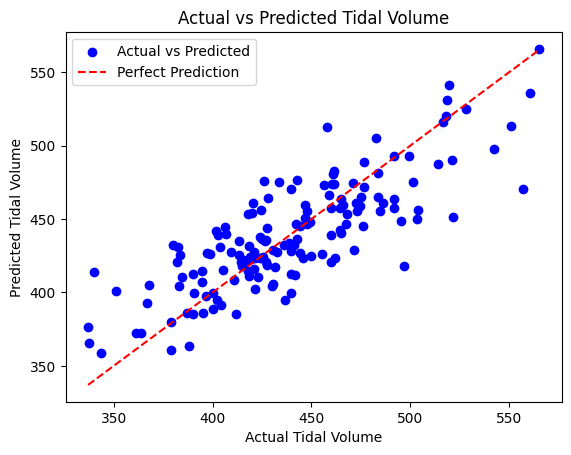

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Making the predictions.
y_pred = model.predict(X)

# Plotting the actual/derived data points.
plt.scatter(y, y_pred, color='blue', label='Actual vs Predicted')

# The regression line is plotted here.
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')

# Taking care of the labels and title
plt.xlabel('Actual Tidal Volume')
plt.ylabel('Predicted Tidal Volume')
plt.title('Actual vs Predicted Tidal Volume')
plt.legend()

# Pictoral Representation
plt.show()

#PLEASE DON'T CONFUSE THIS AS THE FINAL MODEL, THE SETUP IS YET A SUBJECT TO FEW MODIFICATIONS.

In [11]:
def take_input():
    age = int(input("Enter age: "))
    height = int(input("Enter height in cm: "))
    chest_circumference = int(input("Enter chest circumference in cm: "))
    BodyMassIndex = float(input("Enter BMI: "))
    weight=float(input("Enter weight:"))

    return {'age': [age], 'height': [height],
            'chest_circumference': [chest_circumference], 'BodyMassIndex': [BodyMassIndex], 'weight' : [weight]}

# Get input from user for prediction of the tidal volume
print("\nEnter new data for prediction:")
new_data = take_input()

# Data-frame formation
new_df = pd.DataFrame(new_data)

# Prediction of the tidal volume for new data
predicted_tidal_volume = model.predict(new_df)
print(f'Predicted Tidal Volume: {predicted_tidal_volume[0]} ml')


Enter new data for prediction:
Enter age: 18
Enter height in cm: 172
Enter chest circumference in cm: 102
Enter BMI: 20.4
Enter weight:61
Predicted Tidal Volume: 472.1851833541398 ml


In [ ]:
# I had referred to the r_squared values and the mean square error of the 4 models I was supposed to compare.
# It turns out that linear regression model provides the best fit for the dataset at our disposal
# Therefore, though I have provided the code for the remaining three models, it is only for the purpose of verification of accuracy.

In [22]:
# Random Forest Regression Model.   Reason behind choice can be found in the README on the repo.
# Below goes the code for the implementation of the same.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Mounting the dataset
df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separating the features from target variable.
X = df[['age', 'height', 'chest_circumference', 'BodyMassIndex']]
y = df['tidal_volume']

# Spliting step
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#I chose to stick with 100 trees before making the mean prediction from the model as a dataset of 300 points would waste the computation.

rf_model.fit(X_train, y_train)

# Making the final predictions here.
y_pred = rf_model.predict(X_val)

# For the comparison of how well the model fared against the other models being implemented

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 925.0253722666544
R-squared: 0.6164809357134777


In [23]:
# Implementing the support vector regression now

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Mounting the dataset
df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separate features and target variables
X = df[['age', 'height', 'chest_circumference', 'BodyMassIndex']]
y = df['tidal_volume']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.75, random_state=42)

# Initializing the Support Vector Machine Regressor model
svr_model = SVR(kernel='rbf', C=30, gamma='auto', epsilon=0.01)

# Training it
svr_model.fit(X_train, y_train)

# Final Predictions
y_pred = svr_model.predict(X_val)

# Comparison purpose
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 2131.239223446124
R-squared: -0.05113776269129122


In [ ]:
# It is evident at this point that linear regression model was the best performing one for this dataset.
# Also, it turns out that support vector machine does not fit well with the dataset and the predictions are not reliable.

# The metric of comparsion is r_squared value and the mean squared errors obtained from the models I have used.

In [25]:
#Gradient Boosting Regression model is implemented lastly.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# mounting the dataset as I have linked them all with the drive
df = pd.read_csv('/content/drive/MyDrive/TidalVolumeTask_PClub_Recruitment/Dataset_Female.csv')

# Separating the features from the target variable
X = df[['age', 'height',  'chest_circumference', 'BodyMassIndex']]
y = df['tidal_volume']

# Spliting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the training model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# As the n_estimators is 100, I have set it to default so that only 100 trees are formed and no excessive computation is performed.

# Training it now
gb_model.fit(X_train, y_train)

# Final Predictions
y_pred = gb_model.predict(X_val)

# Just for the sake of comparison
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 992.7317350401706
R-squared: 0.5884096182386772
